In [ ]:
# dbscan with full dataset +

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

scaler = StandardScaler()
array_scaled = scaler.fit_transform(array)

pca = PCA(n_components=2)
data_2d = pca.fit_transform(array_scaled)

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

target_labels = np.array(vector_accuracy)


eps = 0.5  
min_samples = 5  

dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)  
labels = dbscan.fit_predict(array_scaled)


plt.figure(figsize=(10, 8))
unique_labels = set(labels)
for cluster_id in unique_labels:
    cluster_data = data_2d[labels == cluster_id]
    if cluster_id == -1:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label="Noise", color="gray", s=5)
        # pass
    else:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}", s=5)  

plt.title("Noise")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# plt.legend()
plt.show()

plt.figure(figsize=(10, 8))  
unique_labels = set(labels)
for cluster_id in unique_labels:
    if cluster_id != -1:  
        cluster_data = data_2d[labels == cluster_id]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}", s=5) 


plt.title("DBSCAN Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# plt.legend()
plt.show()


In [ ]:
# K-means k = по методу силуэта -> PCA
 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import resample

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

sample_array = resample(array, n_samples=1000, random_state=42)

cluster_range = range(2, 11)

silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10)
    cluster_labels = kmeans.fit_predict(sample_array)
    silhouette_avg = silhouette_score(sample_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров: {optimal_clusters}")

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Число кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.grid(True)
plt.show()

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, max_iter=300, n_init=10)
kmeans_optimal.fit(array)
cluster_labels_optimal = kmeans_optimal.labels_

pca = PCA(n_components=2, svd_solver='randomized')
reduced_data = pca.fit_transform(array)

plt.figure(figsize=(10, 7))
for cluster in range(optimal_clusters):
    cluster_points = reduced_data[cluster_labels_optimal == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')
plt.title('Результаты кластеризации (Оптимальные кластеры)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
for label in np.unique(target_labels):
    class_points = reduced_data[target_labels == label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Класс {label}')
plt.title('Визуализация данных (Классовые метки)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Чтение данных
df = pd.read_csv('../september/result/september.csv')

# Преобразование столбца 'text' в массив числовых значений (предполагается, что в строках записаны числа)
array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

# Нормализация данных
scaler = StandardScaler()
array_scaled = scaler.fit_transform(array)

# Применение PCA для уменьшения размерности до 2
pca = PCA(n_components=2)
data_2d = pca.fit_transform(array_scaled)

# Формирование истинных меток (для метрик качества)
vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

true_labels = np.array(vector_accuracy)  # Истинные метки для расчета метрик

eps = 0.3  # Уменьшаем eps
min_samples = 10  # Увеличиваем min_samples
dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)  
labels = dbscan.fit_predict(array_scaled)



# Вычисление метрик качества
silhouette_avg = silhouette_score(array_scaled, labels)
print(f"Коэффициент силуэта: {silhouette_avg}")

rand_index = adjusted_rand_score(true_labels, labels)
print(f"Индекс Ренда: {rand_index}")

mutual_info = mutual_info_score(true_labels, labels)
print(f"Взаимная информация: {mutual_info}")


Коэффициент силуэта: -0.5513068246730972
Индекс Ренда: 0.026115515852757426
Взаимная информация: 0.03302594398405503


Оптимальное число кластеров: 2


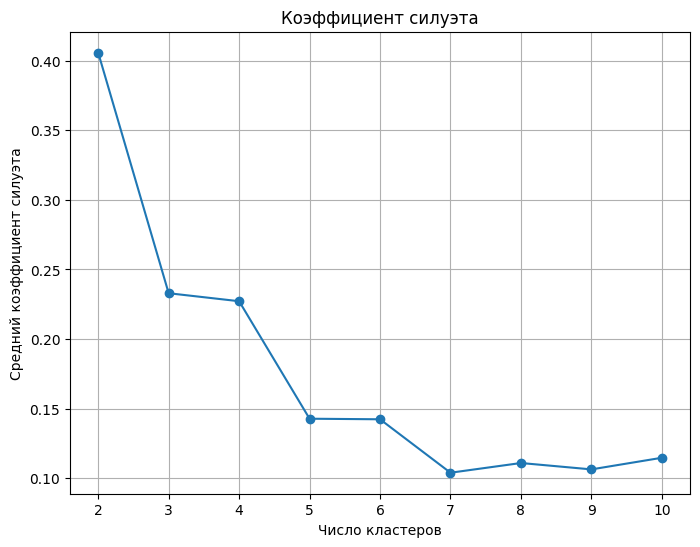

Коэффициент силуэта: -0.5210577617926885
Индекс Ренда: -0.0013317779545969262
Взаимная информация: 0.030804314883410983


In [8]:
# K-means k = по методу силуэта -> PCA
 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import resample

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

sample_array = resample(array, n_samples=1000, random_state=42)

cluster_range = range(2, 11)

silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10)
    cluster_labels = kmeans.fit_predict(sample_array)
    silhouette_avg = silhouette_score(sample_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров: {optimal_clusters}")

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Число кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.grid(True)
plt.show()

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, max_iter=300, n_init=10)
kmeans_optimal.fit(array)
cluster_labels_optimal = kmeans_optimal.labels_

pca = PCA(n_components=2, svd_solver='randomized')
reduced_data = pca.fit_transform(array)


# Вычисление метрик качества
silhouette_avg = silhouette_score(array_scaled, labels)
print(f"Коэффициент силуэта: {silhouette_avg}")

rand_index = adjusted_rand_score(true_labels, labels)
print(f"Индекс Ренда: {rand_index}")

mutual_info = mutual_info_score(true_labels, labels)
print(f"Взаимная информация: {mutual_info}")